In [24]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_groq import ChatGroq

model = ChatGroq(model = "llama-3.1-8b-instant")

In [3]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from typing import Annotated

class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [ ]:
def add(a:int,b:int)->int:
    """Add a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: result
    """

    return a+b

In [16]:

model_with_tool = model.bind_tools([add])


In [17]:
### Tool Calling LL

def llm_tool(state:State):
    return{"messages":[model_with_tool.invoke(state["messages"])]}

In [18]:
tools=[add]

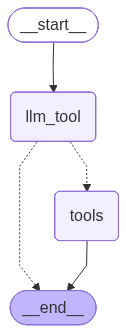

In [19]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display

#Define the Graph
graph = StateGraph(State)

#Add Nodes
graph.add_node("llm_tool",llm_tool)
graph.add_node("tools",ToolNode(tools))

#Add Edges
graph.add_edge(START,"llm_tool")
graph.add_conditional_edges("llm_tool",tools_condition)
graph.add_edge("tools",END)

#Compile the Graph
graph_builder = graph.compile()

#Draw the Graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [20]:
messages = graph_builder.invoke({"messages":"What is 2 plus 2"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (m6t69hj2z)
 Call ID: m6t69hj2z
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: add

4


In [21]:
messages = graph_builder.invoke({"messages":"What is Data Science"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is Data Science
================================== Ai Message ==================================

I'm not aware of any function that directly defines what 'Data Science' is. However, I can provide a general definition and then use the function 'brave_search' to find more information.

Data Science is the process of extracting insights and knowledge from data using various statistical, mathematical, and computational techniques.
